<a href="https://colab.research.google.com/github/KashyapTimbadiya/CE146_ML_Labs/blob/main/ML_Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.1 Steps for Data Transformation**
1. Import Libraries
2. Load Data
3. Seprate Input and Output attributes
4. Perform scaling (Min-Max Normalization)
5. Perform Standardization

In [5]:
# Step 1: Import Libraries
import numpy as np
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [6]:
# Step 2: Load Data
drive.mount("/content/drive")
datasets = pd.read_csv("/content/drive/MyDrive/ML_Labs/Data_for_Transformation.csv")
print("\nData :\n",datasets)
#print("\nData statistics\n",datasets.describe())

Mounted at /content/drive

Data :
     Country  Age  Salary Purchased
0    France   44   72000        No
1     Spain   27   48000       Yes
2   Germany   30   54000        No
3     Spain   38   61000        No
4   Germany   40   68000       Yes
5    France   35   58000       Yes
6     Spain   39   52000        No
7    France   48   79000       Yes
8   Germany   50   83000        No
9    France   37   67000       Yes
10    Spain   45   55000        No


In [ ]:
# Step 3: Seprate Input and Output attributes
# All rows, all columns except last
X = datasets.iloc[:, :-1].values
# Only last column
Y = datasets.iloc[:, -1].values
#print("\n\nInput : \n", X)
#print("\n\nOutput: \n", Y)
X_new = datasets.iloc[:,1:3].values
print("\n\nX for transformation : \n", X_new)




X for transformation : 
 [[   44 72000]
 [   27 48000]
 [   30 54000]
 [   38 61000]
 [   40 68000]
 [   35 58000]
 [   39 52000]
 [   48 79000]
 [   50 83000]
 [   37 67000]
 [   45 55000]]


In [ ]:
# Step 4 : Perform scaling on age and salary
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[0.73913043 0.68571429]
 [0.         0.        ]
 [0.13043478 0.17142857]
 [0.47826087 0.37142857]
 [0.56521739 0.57142857]
 [0.34782609 0.28571429]
 [0.52173913 0.11428571]
 [0.91304348 0.88571429]
 [1.         1.        ]
 [0.43478261 0.54285714]
 [0.7826087  0.2       ]]


In [ ]:
# Step 5 : Perform standardization on age and salary
std = StandardScaler()
X_std = std.fit_transform(X_new)
print("\n\nStandardized X : \n", X_std)



Standardized X : 
 [[ 0.68188156  0.79548755]
 [-1.81835082 -1.41513049]
 [-1.37713334 -0.86247598]
 [-0.2005534  -0.21771238]
 [ 0.09359159  0.42705121]
 [-0.64177088 -0.49403964]
 [-0.05348091 -1.04669415]
 [ 1.27017153  1.44025115]
 [ 1.56431652  1.80868749]
 [-0.34762589  0.33494213]
 [ 0.82895405 -0.77036689]]


# **4.2 Steps for Handling Categorical Data**
1. Import Libraries
2. Load Data
3. Seprate Input and Output attributes
4. Convert the categorical data into numerical data

In [8]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [7]:
# Step 2: Load Data
datasets = pd.read_csv("/content/drive/MyDrive/ML_Labs/Data_for_Categorical_Values.csv")

print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())


Data :
     Country  Age  Salary Purchased
0    France   44   72000        No
1     Spain   27   48000       Yes
2   Germany   30   54000        No
3     Spain   38   61000        No
4   Germany   40   68000       Yes
5    France   35   58000       Yes
6     Spain   39   52000        No
7    France   48   79000       Yes
8   Germany   50   83000        No
9    France   37   67000       Yes
10    Spain   45   55000        No

Data statistics
              Age        Salary
count  11.000000     11.000000
mean   39.363636  63363.636364
std     7.131237  11386.594989
min    27.000000  48000.000000
25%    36.000000  54500.000000
50%    39.000000  61000.000000
75%    44.500000  70000.000000
max    50.000000  83000.000000


In [ ]:
# Step 3: Seprate Input and Output attributes
# All rows, all columns except last
X = datasets.iloc[:, :-1].values
# Only last column
Y = datasets.iloc[:, -1].values
print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)



Input : 
 [['France' 44 72000]
 ['Spain' 27 48000]
 ['Germany' 30 54000]
 ['Spain' 38 61000]
 ['Germany' 40 68000]
 ['France' 35 58000]
 ['Spain' 39 52000]
 ['France' 48 79000]
 ['Germany' 50 83000]
 ['France' 37 67000]
 ['Spain' 45 55000]]


Output: 
 ['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


In [ ]:
# Step 4a: Apply LabelEncoder on the data
# to convert country names into numeric values
le = LabelEncoder()
X[ : ,0] = le.fit_transform(X[ : ,0])
print("\n\nInput : \n", X)



Input : 
 [[0 44 72000]
 [2 27 48000]
 [1 30 54000]
 [2 38 61000]
 [1 40 68000]
 [0 35 58000]
 [2 39 52000]
 [0 48 79000]
 [1 50 83000]
 [0 37 67000]
 [2 45 55000]]


In [ ]:
# Step 4b: Use dummy variables from pandas library
# to create one column for each country
dummy = pd.get_dummies(datasets['Country'])
print("\n\nDummy :\n",dummy)
datasets = datasets.drop(['Country','Purchased'],axis=1)
datasets = pd.concat([dummy,datasets],axis=1)
print("\n\nFinal Data :\n",datasets)



Dummy :
     France  Germany  Spain
0        1        0      0
1        0        0      1
2        0        1      0
3        0        0      1
4        0        1      0
5        1        0      0
6        0        0      1
7        1        0      0
8        0        1      0
9        1        0      0
10       0        0      1


Final Data :
     France  Germany  Spain  Age  Salary
0        1        0      0   44   72000
1        0        0      1   27   48000
2        0        1      0   30   54000
3        0        0      1   38   61000
4        0        1      0   40   68000
5        1        0      0   35   58000
6        0        0      1   39   52000
7        1        0      0   48   79000
8        0        1      0   50   83000
9        1        0      0   37   67000
10       0        0      1   45   55000


In [9]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Step 2: Load Data
datasets = pd.read_csv("/content/drive/MyDrive/ML_Labs/Data_for_Categorical_Values.csv")



#Use One Hot Encoder from scikit learn
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the␣,→object
x = onehotencoder.fit_transform(datasets.Country.values.reshape(-1,1)).toarray()
print("\n")
print(x)





[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [10]:
dfOneHot = pd.DataFrame(x, columns = ["Country_"+str(int(i)) for i in range(datasets.shape[1]-1)])
df = pd.concat([datasets, dfOneHot], axis=1) #column
#droping the country column
df= df.drop(['Country'], axis=1)
#printing to verify
print(df.head())

   Age  Salary Purchased  Country_0  Country_1  Country_2
0   44   72000        No        1.0        0.0        0.0
1   27   48000       Yes        0.0        0.0        1.0
2   30   54000        No        0.0        1.0        0.0
3   38   61000        No        0.0        0.0        1.0
4   40   68000       Yes        0.0        1.0        0.0


# **4.3 Steps for Handling the missing value**
1. Import Libraries
2. Load data
3. Seprate Input and Output attributes
4. Find the missing values and handle it in either way
  a. Removing data
  b. Imputation

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer


In [11]:
# Step 2: Load Data
datasets = pd.read_csv("/content/drive/MyDrive/ML_Labs/Data_for_Missing_Values.csv")

print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())


Data :
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No

Data statistics
              Age        Salary
count  10.000000     10.000000
mean   39.400000  62900.000000
std     7.515909  11892.574714
min    27.000000  48000.000000
25%    35.500000  54250.000000
50%    39.000000  59500.000000
75%    44.750000  70750.000000
max    50.000000  83000.000000


In [ ]:
# Step 3: Seprate Input and Output attributes
# All rows, all columns except last
X = datasets.iloc[:, :-1].values
# Only last column
Y = datasets.iloc[:, -1].values
print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)



Input : 
 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 [nan nan nan]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Spain' 45.0 55000.0]]


Output: 
 ['No' 'Yes' 'No' 'No' nan 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


In [ ]:
# Step 4: Find the missing values and handle it in either way
# 4a. Removing the row with all null values
datasets.dropna(axis=0,how='all',inplace=True)
print("\nNew Data :",datasets)



New Data :     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [ ]:
#4b. Removing the row with any one null values
datasets.dropna(axis=0,how='any',inplace=True)
print("\nNew Data :",datasets)




New Data :     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
6    France  35.0  58000.0       Yes
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


In [ ]:
updated_df = datasets;
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df.info()
print("\n" , datasets)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    9 non-null      object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  9 non-null      object 
dtypes: float64(2), object(2)
memory usage: 360.0+ bytes

     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
6    France  35.0  58000.0       Yes
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    9 non-null      object 
 1   Ag

In [ ]:
updated_df = datasets;
updated_df['Salary']=updated_df['Salary'].fillna(updated_df['Salary'].mean())
updated_df.info()

print("\n" , datasets)

In [12]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
# Step 2: Load Data
datasets = pd.read_csv("/content/drive/MyDrive/ML_Labs/Data_for_Missing_Values.csv")

print("\nData :\n",datasets)
print("\nData statistics\n",datasets.describe())

# Step 3: Seprate Input and Output attributes
# All rows, all columns except last
X = datasets.iloc[:, :-1].values
# Only last column
Y = datasets.iloc[:, -1].values
print("\n\nInput : \n", X)
print("\n\nOutput: \n", Y)

# Step 4: Find the missing values and handle it in either way
# 4a. Removing the row with all null values
datasets.dropna(axis=0,how='all',inplace=True)
print("\nNew Data :",datasets)

#4b. Removing the row with any one null values
#datasets.dropna(axis=0,how='any',inplace=True)


Data :
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No

Data statistics
              Age        Salary
count  10.000000     10.000000
mean   39.400000  62900.000000
std     7.515909  11892.574714
min    27.000000  48000.000000
25%    35.500000  54250.000000
50%    39.000000  59500.000000
75%    44.750000  70750.000000
max    50.000000  83000.000000


Input : 
 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 [nan nan nan]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 7

In [ ]:
# 4b. Imputation (Replacing null values with mean value of that attribute)
# All rows, all columns except last
new_X = datasets.iloc[:, :-1].values
# Only last column
new_Y = datasets.iloc[:, -1].values
updated_df['Age'].fillna(updated_df['Age'].mean())
# Using Imputer function to replace NaN values with mean of that parameter value


imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
# Fitting the data, function learns the stats
imputer = imputer.fit(new_X[:, 1:3])
# fit_transform() will execute those stats on the input ie. X[:, 1:3]
new_X[:, 1:3] = imputer.transform(new_X[:, 1:3])
# filling the missing value with mean
print("\n\nNew Input with Mean Value for NaN : \n\n", new_X)



New Input with Mean Value for NaN : 

 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 62900.0]
 ['France' 35.0 58000.0]
 ['Spain' 39.4 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Spain' 45.0 55000.0]]


# **4.4 Correlation**

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
data = pd.read_csv(("/content/drive/MyDrive/ML_Labs/Data_for_Correlation.csv"))
data.head()


,X1,X2,X3,X4,Y
0,1,1,4,-2,1
1,2,4,5,-4,1
2,3,9,6,3,0
3,4,16,7,4,0
4,5,25,8,25,1


In [ ]:
data = data.iloc[:,:-1]
data.head()

,X1,X2,X3,X4
0,1,1,4,-2
1,2,4,5,-4
2,3,9,6,3
3,4,16,7,4
4,5,25,8,25


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      14 non-null     int64
 1   X2      14 non-null     int64
 2   X3      14 non-null     int64
 3   X4      14 non-null     int64
dtypes: int64(4)
memory usage: 576.0 bytes


In [ ]:
corr = data.corr()
corr.head()

,X1,X2,X3,X4
X1,1.000000,0.972714,1.000000,0.263266
X2,0.972714,1.000000,0.972714,0.163575
X3,1.000000,0.972714,1.000000,0.263266
X4,0.263266,0.163575,0.263266,1.000000


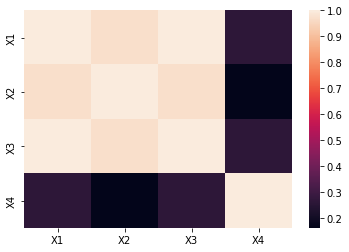

In [ ]:
sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
        columns[j] = False

selected_columns = data.columns[columns]
selected_columns.shape

data = data[selected_columns]
print(data)

    X1   X4
0    1   -2
1    2   -4
2    3    3
3    4    4
4    5   25
5    6   76
6    7   34
7    8  346
8    9   67
9   10    3
10  11  355
11  12   88
12  13    2
13  14    1


# **EXERCISE **

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
drive.mount("/content/drive")
dataset = pd.read_csv('/content/drive/MyDrive/ML_Labs/Exercise-CarData.csv',na_values = ["????","??"])

print(dataset.dtypes)
print(dataset)
dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unnamed: 0      int64
Price           int64
Age           float64
KM            float64
FuelType       object
HP            float64
MetColor      float64
Automatic       int64
CC              int64
Doors          object
Weight          int64
dtype: object
      Unnamed: 0  Price   Age       KM FuelType     HP  MetColor  Automatic  \
0              0  13500  23.0  46986.0   Diesel   90.0       1.0          0   
1              1  13750  23.0  72937.0   Diesel   90.0       1.0          0   
2              2  13950  24.0  41711.0   Diesel   90.0       NaN          0   
3              3  14950  26.0  48000.0   Diesel   90.0       0.0          0   
4              4  13750  30.0  38500.0   Diesel   90.0       0.0          0   
...          ...    ...   ...      ...      ...    ...       ...        ...   
1431        1431   7500   NaN  20544.0   Petrol   86.0       1

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015


In [16]:
for col_name,col_val in dataset.iteritems():
  print("nan values in column (",col_name,") is : ",dataset[col_name].isna().sum())

nan values in column ( Unnamed: 0 ) is :  0
nan values in column ( Price ) is :  0
nan values in column ( Age ) is :  100
nan values in column ( KM ) is :  15
nan values in column ( FuelType ) is :  100
nan values in column ( HP ) is :  6
nan values in column ( MetColor ) is :  150
nan values in column ( Automatic ) is :  0
nan values in column ( CC ) is :  0
nan values in column ( Doors ) is :  0
nan values in column ( Weight ) is :  0


In [17]:
# Step 3: Seprate Input and Output attributes

x = dataset.iloc[:, ~dataset.columns.isin(['Price'])].values
print("Features (x) : \n",x)
print()

y = dataset.iloc[:,1].values
print("Size of y : ",y.size)
print("Label (y) :",y)

x_new = dataset.iloc[:, ~dataset.columns.isin(['FuelType','Doors','Price'])].values
print("\nx_new : \n",x_new)

Features (x) : 
 [[0 23.0 46986.0 ... 2000 'three' 1165]
 [1 23.0 72937.0 ... 2000 '3' 1165]
 [2 24.0 41711.0 ... 2000 '3' 1165]
 ...
 [1433 nan 17016.0 ... 1300 '3' 1015]
 [1434 70.0 nan ... 1300 '3' 1015]
 [1435 76.0 1.0 ... 1600 '5' 1114]]

Size of y :  1436
Label (y) : [13500 13750 13950 ...  8500  7250  6950]

x_new : 
 [[0.0000e+00 2.3000e+01 4.6986e+04 ... 0.0000e+00 2.0000e+03 1.1650e+03]
 [1.0000e+00 2.3000e+01 7.2937e+04 ... 0.0000e+00 2.0000e+03 1.1650e+03]
 [2.0000e+00 2.4000e+01 4.1711e+04 ... 0.0000e+00 2.0000e+03 1.1650e+03]
 ...
 [1.4330e+03        nan 1.7016e+04 ... 0.0000e+00 1.3000e+03 1.0150e+03]
 [1.4340e+03 7.0000e+01        nan ... 0.0000e+00 1.3000e+03 1.0150e+03]
 [1.4350e+03 7.6000e+01 1.0000e+00 ... 0.0000e+00 1.6000e+03 1.1140e+03]]


In [18]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_new)
print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[0.00000000e+00 2.78481013e-01 1.93354705e-01 ... 0.00000000e+00
  1.00000000e+00 2.68292683e-01]
 [6.96864111e-04 2.78481013e-01 3.00149383e-01 ... 0.00000000e+00
  1.00000000e+00 2.68292683e-01]
 [1.39372822e-03 2.91139241e-01 1.71646797e-01 ... 0.00000000e+00
  1.00000000e+00 2.68292683e-01]
 ...
 [9.98606272e-01            nan 7.00208643e-02 ... 0.00000000e+00
  0.00000000e+00 2.43902439e-02]
 [9.99303136e-01 8.73417722e-01            nan ... 0.00000000e+00
  0.00000000e+00 2.43902439e-02]
 [1.00000000e+00 9.49367089e-01 0.00000000e+00 ... 0.00000000e+00
  4.28571429e-01 1.85365854e-01]]


In [19]:
std = StandardScaler()
X_std = std.fit_transform(x_new)
print("\n\nStandardized X : \n", X_std)



Standardized X : 
 [[-1.73084506 -1.75818903 -0.58042086 ... -0.24289308  2.31497633
   1.75856113]
 [-1.72843274 -1.75818903  0.11494569 ... -0.24289308  2.31497633
   1.75856113]
 [-1.72602041 -1.70437596 -0.72176642 ... -0.24289308  2.31497633
   1.75856113]
 ...
 [ 1.72602041         nan -1.383478   ... -0.24289308 -1.42599356
  -1.09191497]
 [ 1.72843274  0.7710253          nan ... -0.24289308 -1.42599356
  -1.09191497]
 [ 1.73084506  1.09390373 -1.83940116 ... -0.24289308  0.17727925
   0.78939926]]


In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [21]:
dataset

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015


In [22]:
print("Input (Features) :\n",x)
print()
print("Output (Label) :\n",y)

Input (Features) :
 [[0 23.0 46986.0 ... 2000 'three' 1165]
 [1 23.0 72937.0 ... 2000 '3' 1165]
 [2 24.0 41711.0 ... 2000 '3' 1165]
 ...
 [1433 nan 17016.0 ... 1300 '3' 1015]
 [1434 70.0 nan ... 1300 '3' 1015]
 [1435 76.0 1.0 ... 1600 '5' 1114]]

Output (Label) :
 [13500 13750 13950 ...  8500  7250  6950]


In [23]:
le = LabelEncoder()
x[ : ,3] = le.fit_transform(x[ : ,3])
print("\n\nInput : \n", x[:,3])



Input : 
 [1 1 1 ... 2 3 2]


In [24]:

dummy = pd.get_dummies(dataset['FuelType'])
print("\n\nDummy :\n",dummy)
dataset = dataset.drop(['FuelType'],axis=1)
dataset.insert(loc = 4,
               column = 'CNG',
               value = dummy.iloc[:,0])
dataset.insert(loc = 5,
               column = 'Diesel',
               value = dummy.iloc[:,1])
dataset.insert(loc = 6,
               column = 'Petrol',
               value = dummy.iloc[:,2])
print("\n\nFinal Data :\n",dataset)



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       0
1435    0       0       1

[1436 rows x 3 columns]


Final Data :
       Unnamed: 0  Price   Age       KM  CNG  Diesel  Petrol     HP  MetColor  \
0              0  13500  23.0  46986.0    0       1       0   90.0       1.0   
1              1  13750  23.0  72937.0    0       1       0   90.0       1.0   
2              2  13950  24.0  41711.0    0       1       0   90.0       NaN   
3              3  14950  26.0  48000.0    0       1       0   90.0       0.0   
4              4  13750  30.0  38500.0    0       1       0   90.0       0.0   
...          ...    ...   ...      ...  ...     ...     ...    ...       ...   
1431        1431   7500   NaN  20544.0    0       0       1   86.0       1.0

In [25]:
dataset

,Unnamed: 0,Price,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,0,1,0,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,0,1,0,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,0,1,0,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,0,1,0,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,0,1,0,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544.0,0,0,1,86.0,1.0,0,1300,3,1025
1432,1432,10845,72.0,NaN,0,0,1,86.0,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016.0,0,0,1,86.0,0.0,0,1300,3,1015
1434,1434,7250,70.0,NaN,0,0,0,86.0,1.0,0,1300,3,1015


In [26]:
from sklearn.impute import SimpleImputer

In [27]:
dataset

,Unnamed: 0,Price,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,0,1,0,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,0,1,0,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,0,1,0,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,0,1,0,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,0,1,0,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544.0,0,0,1,86.0,1.0,0,1300,3,1025
1432,1432,10845,72.0,NaN,0,0,1,86.0,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016.0,0,0,1,86.0,0.0,0,1300,3,1015
1434,1434,7250,70.0,NaN,0,0,0,86.0,1.0,0,1300,3,1015


In [28]:
# data is already seprated
print("Input (Features) :\n",x)
print()
print("Output (Label) :\n",y)

Input (Features) :
 [[0 23.0 46986.0 ... 2000 'three' 1165]
 [1 23.0 72937.0 ... 2000 '3' 1165]
 [2 24.0 41711.0 ... 2000 '3' 1165]
 ...
 [1433 nan 17016.0 ... 1300 '3' 1015]
 [1434 70.0 nan ... 1300 '3' 1015]
 [1435 76.0 1.0 ... 1600 '5' 1114]]

Output (Label) :
 [13500 13750 13950 ...  8500  7250  6950]


In [29]:
data1 = pd.DataFrame(dataset)
data1.dropna(axis=0,how='any',inplace=True)
print("\nNew Data :",data1)
print()
data1.info()


New Data :       Unnamed: 0  Price   Age       KM  CNG  Diesel  Petrol     HP  MetColor  \
0              0  13500  23.0  46986.0    0       1       0   90.0       1.0   
1              1  13750  23.0  72937.0    0       1       0   90.0       1.0   
3              3  14950  26.0  48000.0    0       1       0   90.0       0.0   
4              4  13750  30.0  38500.0    0       1       0   90.0       0.0   
5              5  12950  32.0  61000.0    0       1       0   90.0       0.0   
...          ...    ...   ...      ...  ...     ...     ...    ...       ...   
1423        1423   7950  80.0  35821.0    0       0       1   86.0       0.0   
1424        1424   7750  73.0  34717.0    0       0       1   86.0       0.0   
1429        1429   8950  78.0  24000.0    0       0       1   86.0       1.0   
1430        1430   8450  80.0  23000.0    0       0       1   86.0       0.0   
1435        1435   6950  76.0      1.0    0       0       1  110.0       0.0   

      Automatic    CC  Door

In [30]:
print(dataset)
data2 = pd.DataFrame(dataset)
print(data2)

      Unnamed: 0  Price   Age       KM  CNG  Diesel  Petrol     HP  MetColor  \
0              0  13500  23.0  46986.0    0       1       0   90.0       1.0   
1              1  13750  23.0  72937.0    0       1       0   90.0       1.0   
2              2  13950  24.0  41711.0    0       1       0   90.0       NaN   
3              3  14950  26.0  48000.0    0       1       0   90.0       0.0   
4              4  13750  30.0  38500.0    0       1       0   90.0       0.0   
...          ...    ...   ...      ...  ...     ...     ...    ...       ...   
1431        1431   7500   NaN  20544.0    0       0       1   86.0       1.0   
1432        1432  10845  72.0      NaN    0       0       1   86.0       0.0   
1433        1433   8500   NaN  17016.0    0       0       1   86.0       0.0   
1434        1434   7250  70.0      NaN    0       0       0   86.0       1.0   
1435        1435   6950  76.0      1.0    0       0       1  110.0       0.0   

      Automatic    CC  Doors  Weight  


In [31]:
for col_name,col_val in data2.iteritems():
  if(col_name != "Price" and col_name != "CNG" and col_name != "Diesel" and col_name != "Petrol" and col_name != "Doors"):
    if(data2[col_name].isna().sum() != 0):
      data2[col_name] = data2[col_name].fillna(data2[col_name].mean())

data2

,Unnamed: 0,Price,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.000000,46986.000000,0,1,0,90.0,1.000000,0,2000,three,1165
1,1,13750,23.000000,72937.000000,0,1,0,90.0,1.000000,0,2000,3,1165
2,2,13950,24.000000,41711.000000,0,1,0,90.0,0.674961,0,2000,3,1165
3,3,14950,26.000000,48000.000000,0,1,0,90.0,0.000000,0,2000,3,1165
4,4,13750,30.000000,38500.000000,0,1,0,90.0,0.000000,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,55.672156,20544.000000,0,0,1,86.0,1.000000,0,1300,3,1025
1432,1432,10845,72.000000,68647.239972,0,0,1,86.0,0.000000,0,1300,3,1015
1433,1433,8500,55.672156,17016.000000,0,0,1,86.0,0.000000,0,1300,3,1015
1434,1434,7250,70.000000,68647.239972,0,0,0,86.0,1.000000,0,1300,3,1015


In [32]:
data3 = pd.DataFrame(dataset)
print(data3)

      Unnamed: 0  Price        Age            KM  CNG  Diesel  Petrol     HP  \
0              0  13500  23.000000  46986.000000    0       1       0   90.0   
1              1  13750  23.000000  72937.000000    0       1       0   90.0   
2              2  13950  24.000000  41711.000000    0       1       0   90.0   
3              3  14950  26.000000  48000.000000    0       1       0   90.0   
4              4  13750  30.000000  38500.000000    0       1       0   90.0   
...          ...    ...        ...           ...  ...     ...     ...    ...   
1431        1431   7500  55.672156  20544.000000    0       0       1   86.0   
1432        1432  10845  72.000000  68647.239972    0       0       1   86.0   
1433        1433   8500  55.672156  17016.000000    0       0       1   86.0   
1434        1434   7250  70.000000  68647.239972    0       0       0   86.0   
1435        1435   6950  76.000000      1.000000    0       0       1  110.0   

      MetColor  Automatic    CC  Doors 

In [33]:
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
for i in range(0,len(data3.axes[1])):
  if(data3.iloc[:,i].isna().sum() > 0 and (data3.iloc[:,:i].dtype == "int64" or data3.iloc[:,:i].dtype == "float64")):
    imputer = imputer.fit(data3[:, i:i+1])
    data3.iloc[:,:i] = imputer.transform(data3.iloc[:,i:i+1])
data3

,Unnamed: 0,Price,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.000000,46986.000000,0,1,0,90.0,1.000000,0,2000,three,1165
1,1,13750,23.000000,72937.000000,0,1,0,90.0,1.000000,0,2000,3,1165
2,2,13950,24.000000,41711.000000,0,1,0,90.0,0.674961,0,2000,3,1165
3,3,14950,26.000000,48000.000000,0,1,0,90.0,0.000000,0,2000,3,1165
4,4,13750,30.000000,38500.000000,0,1,0,90.0,0.000000,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,55.672156,20544.000000,0,0,1,86.0,1.000000,0,1300,3,1025
1432,1432,10845,72.000000,68647.239972,0,0,1,86.0,0.000000,0,1300,3,1015
1433,1433,8500,55.672156,17016.000000,0,0,1,86.0,0.000000,0,1300,3,1015
1434,1434,7250,70.000000,68647.239972,0,0,0,86.0,1.000000,0,1300,3,1015


In [34]:
import seaborn as sns

In [35]:
dataset2 = pd.DataFrame(dataset)
dataset2.drop(dataset2.columns[[1,11]],axis=1,inplace=True)
dataset2

,Unnamed: 0,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Weight
0,0,23.000000,46986.000000,0,1,0,90.0,1.000000,0,2000,1165
1,1,23.000000,72937.000000,0,1,0,90.0,1.000000,0,2000,1165
2,2,24.000000,41711.000000,0,1,0,90.0,0.674961,0,2000,1165
3,3,26.000000,48000.000000,0,1,0,90.0,0.000000,0,2000,1165
4,4,30.000000,38500.000000,0,1,0,90.0,0.000000,0,2000,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,55.672156,20544.000000,0,0,1,86.0,1.000000,0,1300,1025
1432,1432,72.000000,68647.239972,0,0,1,86.0,0.000000,0,1300,1015
1433,1433,55.672156,17016.000000,0,0,1,86.0,0.000000,0,1300,1015
1434,1434,70.000000,68647.239972,0,0,0,86.0,1.000000,0,1300,1015


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1436 non-null   float64
 3   KM          1436 non-null   float64
 4   CNG         1436 non-null   uint8  
 5   Diesel      1436 non-null   uint8  
 6   Petrol      1436 non-null   uint8  
 7   HP          1436 non-null   float64
 8   MetColor    1436 non-null   float64
 9   Automatic   1436 non-null   int64  
 10  CC          1436 non-null   int64  
 11  Doors       1436 non-null   object 
 12  Weight      1436 non-null   int64  
dtypes: float64(4), int64(5), object(1), uint8(3)
memory usage: 116.5+ KB


In [37]:
corr = dataset2.corr()
corr.head(15)

,Unnamed: 0,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Weight
Unnamed: 0,1.000000,0.872938,0.276041,-0.043811,-0.139813,0.124362,-0.108220,-0.074515,0.066299,-0.184490,-0.414577
Age,0.872938,1.000000,0.495199,0.006722,-0.068693,0.062043,-0.152946,-0.091331,0.030931,-0.116255,-0.442055
KM,0.276041,0.495199,1.000000,0.145203,0.404627,-0.323775,-0.332984,-0.088587,-0.080743,0.296281,-0.025758
CNG,-0.043811,0.006722,0.145203,1.000000,-0.034300,-0.219022,0.059430,0.003485,-0.024955,0.018141,0.051688
Diesel,-0.139813,-0.068693,0.404627,-0.034300,1.000000,-0.711686,-0.520332,-0.014227,-0.081090,0.730292,0.516471
Petrol,0.124362,0.062043,-0.323775,-0.219022,-0.711686,1.000000,0.404101,-0.005961,0.058664,-0.561913,-0.425511
HP,-0.108220,-0.152946,-0.332984,0.059430,-0.520332,0.404101,1.000000,0.060990,0.013753,0.053466,0.086214
MetColor,-0.074515,-0.091331,-0.088587,0.003485,-0.014227,-0.005961,0.060990,1.000000,-0.013167,0.027524,0.054952
Automatic,0.066299,0.030931,-0.080743,-0.024955,-0.081090,0.058664,0.013753,-0.013167,1.000000,-0.069321,0.057249
CC,-0.184490,-0.116255,0.296281,0.018141,0.730292,-0.561913,0.053466,0.027524,-0.069321,1.000000,0.651450


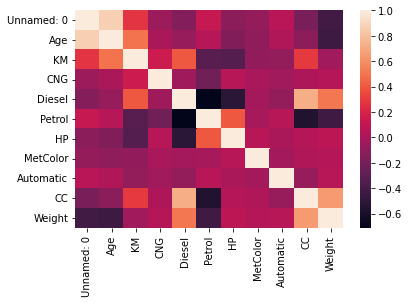

In [38]:
sns.heatmap(corr)

In [39]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
        columns[j] = False

In [40]:
selected_columns = dataset2.columns[columns]
selected_columns.shape

(11,)

In [41]:
data = dataset2[selected_columns]
print(data)

      Unnamed: 0        Age            KM  CNG  Diesel  Petrol     HP  \
0              0  23.000000  46986.000000    0       1       0   90.0   
1              1  23.000000  72937.000000    0       1       0   90.0   
2              2  24.000000  41711.000000    0       1       0   90.0   
3              3  26.000000  48000.000000    0       1       0   90.0   
4              4  30.000000  38500.000000    0       1       0   90.0   
...          ...        ...           ...  ...     ...     ...    ...   
1431        1431  55.672156  20544.000000    0       0       1   86.0   
1432        1432  72.000000  68647.239972    0       0       1   86.0   
1433        1433  55.672156  17016.000000    0       0       1   86.0   
1434        1434  70.000000  68647.239972    0       0       0   86.0   
1435        1435  76.000000      1.000000    0       0       1  110.0   

      MetColor  Automatic    CC  Weight  
0     1.000000          0  2000    1165  
1     1.000000          0  2000    1165